In [28]:
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [93]:
def model(y,t,par,RIGI):
    IFN,IFNe,STATP,IRF7,IRF7P,P,V=y
    #IFN, ODE 0 parameters
    k11=1e5
    n=3
    k12=par[0]
    k13=par[1]
    k14=par[2]
    #IFN_env, ODE 1 parameters
    k21=par[3]
    tau2=par[4]
    #STATP, ODE 2 parameters
    k31=par[5]
    k32=par[6]
    k33=par[7]
    #IRF7, ODE 3 parameters
    k41=par[8]
    k42=par[9]
    #IRF7P, ODE 4 parameters
    k51=par[10]
    #Cells, ODE 5 parameters
    k61=par[11]
    #Virus, ODE 6 parameters
    k71=par[12]
    k72=par[13]
    k73=par[14]
    dydt=[
        P*(k11*RIGI*V+(k12*V**n)/(k13+V**n)+k14*y[4])-k21*IFN,
        k21*IFN-tau2*y[1],
        (k31*IFNe*P)/(k32+k33*IFNe)-0.3*STATP,
        P*(k41*STATP+k42*IRF7P)-0.3*IRF7,
        k51*IRF7*P-0.3*IRF7P,
        -k61*P*V,
        (k71*P*V)/(1+k72*(IFNe*7E-5))-k73*V      
    ]
    return dydt

In [100]:
#Initial conditions
y0=[0, 0, 0, 0.72205, 0, 1, 6.9e-8]

#Parameter values
par=[9.746,12.511,13.562,10.385,3.481,45.922,
     5.464,0.068,0.115,1.053,0.202,0.635,1.537,47.883,0.197]

#PR8, RIGI is assumed antagonized. dNS1PR8 RIGI=1
RIGI=0

#time frame to solve in
t=np.linspace(0,24.0,500)

#Solve the model
from scipy.integrate import odeint
sol = odeint(model,y0,t,args=(par,RIGI))

Text(0.5, 1.0, 'Virus')

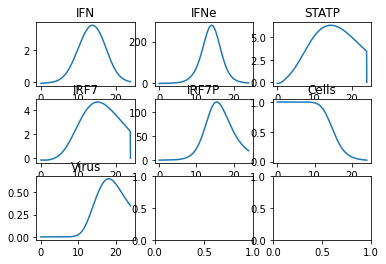

In [101]:
#Shift represents the background noise shift from RNA seq data
shift = [7.939, 0, 12.2075, 13.4271, 0, 0, 0]

#Control is the averaged control RNA seq data (with background noise)
Control = [8.5684305, 13.24601, 15.767315]

#Measured species are reported in Log2 Fold Change (LFC)
def LFC(data,control):
    y=np.shape(data)[0]
    result=np.zeros(y)
    for i in range (0,y-1):
        result[i]=np.log2(data[i]/control)
    return result

IFN=[]; IFNe=[]; STATP=[]; IRF7=[];
IRF7P=[]; P=[]; V=[];

#Assign species labels, add background noise shift, LFC as needed
IFN=sol[:,0]+shift[0];IFN=LFC(IFN,Control[0])
IFNe=sol[:,1]
STATP=sol[:,2]+shift[2];STATP=LFC(STATP,Control[1])
IRF7=sol[:,3]+shift[3];IRF7=LFC(IRF7,Control[2])
IRF7P=sol[:,4]
P=sol[:,5]
V=sol[:,6]

#Plot
fig, ax = plt.subplots(3,3)
ax[0,0].plot(t,IFN); ax[0,0].set_title('IFN');
ax[0,1].plot(t,IFNe); ax[0,1].set_title('IFNe')
ax[0,2].plot(t,STATP); ax[0,2].set_title('STATP');
ax[1,0].plot(t,IRF7); ax[1,0].set_title('IRF7');
ax[1,1].plot(t,IRF7P); ax[1,1].set_title('IRF7P')
ax[1,2].plot(t,P); ax[1,2].set_title('Cells')
ax[2,0].plot(t,V); ax[2,0].set_title('Virus')